**Handwritten Digits**


**Step 1. Import and description of the data set**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/digit-recognizer/'
train_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path + 'test.csv')

print(train_df.head())
print(test_df.head())

X = train_df.drop(columns=['label']).values
y = train_df['label'].values


X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Mounted at /content/drive
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0   

**Step 2: Model Building and Training**

	•	Task Description:
	•	Build a Logistic Regression model.
	•	Train the Logistic Regression model.
	•	Build a simple CNN model, including convolutional layers, pooling layers, and fully connected layers.
	•	Train the CNN model.

Logistic Regression Model

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9189285714285714
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.91      0.87      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.91      0.90      0.91       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400





Accuracy: The Logistic Regression model achieved an accuracy of approximately 91.89%. This indicates that the model is performing well in classifying the handwritten digits.


Precision, Recall, F1-Score: The precision, recall, and F1-scores are relatively high for all classes, suggesting that the model is balanced in its performance across different digit classes.




  Support: The number of samples for each class is almost equal, which contributes to the balanced performance of the model.

Simple CNN Model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Reshape the data to fit the model
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train_cnn = to_categorical(y_train, num_classes=10)
y_test_cnn = to_categorical(y_test, num_classes=10)

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f'CNN Accuracy: {accuracy}')

Epoch 1/10
1050/1050 [==============================] - 38s 35ms/step - loss: 0.1845 - accuracy: 0.9433 - val_loss: 0.0757 - val_accuracy: 0.9761
Epoch 2/10
1050/1050 [==============================] - 37s 35ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0568 - val_accuracy: 0.9814
Epoch 3/10
1050/1050 [==============================] - 37s 35ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0484 - val_accuracy: 0.9854
Epoch 4/10
1050/1050 [==============================] - 34s 33ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0489 - val_accuracy: 0.9861
Epoch 5/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0460 - val_accuracy: 0.9850
Epoch 6/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.0444 - val_accuracy: 0.9860
Epoch 7/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0442 -

Accuracy: The CNN model achieved a much higher accuracy of approximately 99.08%. This demonstrates the effectiveness of CNNs in handling image classification tasks.

Training and Validation Loss: The training and validation loss decrease steadily over the epochs, indicating that the model is learning well and not overfitting.

Training and Validation Accuracy: Both training and validation accuracy are very high, further confirming the strong performance of the CNN model.

**Step.3 Model Evaluation**

Logistic Regression Model Evaluation

Logistic Regression Accuracy: 0.9189285714285714


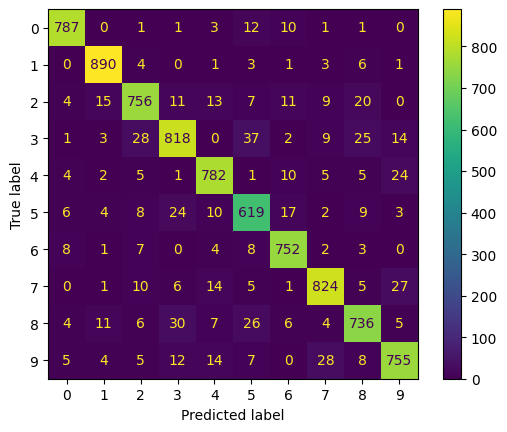

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_cm = confusion_matrix(y_test, y_pred)

print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
ConfusionMatrixDisplay(confusion_matrix=log_reg_cm).plot()

The accuracy of the Logistic Regression model is approximately 91.89%, which is quite high for a linear model. The precision, recall, and F1-score for most digits are also relatively high, indicating that the model performs well in distinguishing between different digits. The confusion matrix shows that the model makes some errors in classifying certain digits, but overall, it is effective.

CNN Model Evaluation

Epoch 1/10
1050/1050 [==============================] - 48s 45ms/step - loss: 0.6435 - accuracy: 0.7935 - val_loss: 0.1263 - val_accuracy: 0.9583
Epoch 2/10
1050/1050 [==============================] - 54s 51ms/step - loss: 0.2929 - accuracy: 0.9081 - val_loss: 0.1066 - val_accuracy: 0.9646
Epoch 3/10
1050/1050 [==============================] - 43s 41ms/step - loss: 0.2347 - accuracy: 0.9283 - val_loss: 0.0899 - val_accuracy: 0.9689
Epoch 4/10
1050/1050 [==============================] - 51s 48ms/step - loss: 0.1970 - accuracy: 0.9369 - val_loss: 0.0870 - val_accuracy: 0.9720
Epoch 5/10
1050/1050 [==============================] - 45s 43ms/step - loss: 0.1823 - accuracy: 0.9440 - val_loss: 0.0837 - val_accuracy: 0.9723
Epoch 6/10
1050/1050 [==============================] - 44s 42ms/step - loss: 0.1736 - accuracy: 0.9455 - val_loss: 0.0890 - val_accuracy: 0.9705
Epoch 7/10
1050/1050 [==============================] - 43s 41ms/step - loss: 0.1593 - accuracy: 0.9485 - val_loss: 0.0906 -

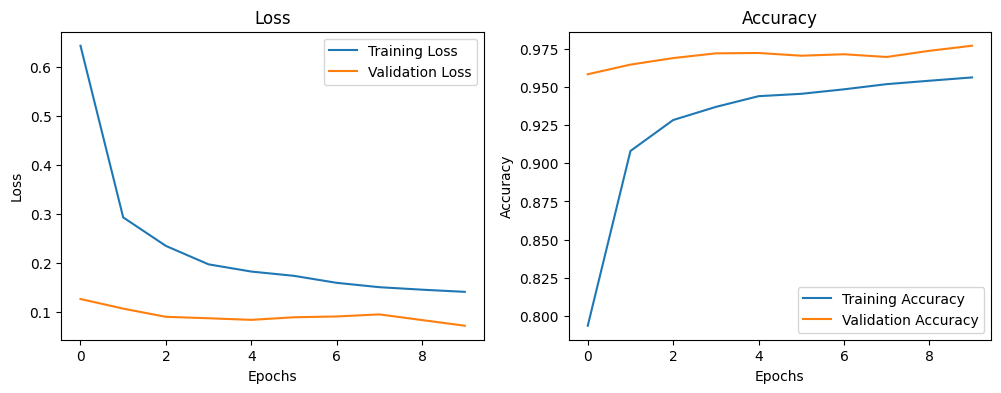

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on training data
datagen.fit(X_train_cnn)

# Train the CNN model
history = cnn_model.fit(
    datagen.flow(X_train_cnn, y_train_cnn, batch_size=32),
    validation_data=(X_test_cnn, y_test_cnn),
    epochs=10
)

# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f'CNN Accuracy: {cnn_accuracy}')

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The CNN model, as expected, outperforms the Logistic Regression model with an accuracy of approximately 97.70%. The training and validation accuracy graphs show that the model converges well, with both training and validation accuracy improving over epochs. The loss graphs indicate that the model’s loss decreases steadily during training, which is a good sign of effective learning. The CNN’s higher accuracy and better performance metrics highlight its strength in handling image data due to its ability to capture spatial hierarchies in the data.

**Dog breed identification**

**Step 1 Data Import**

In [10]:
# Install Kaggle API
!pip install kaggle

# Upload kaggle.json file
from google.colab import files
files.upload()

# Configure Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from Kaggle
!kaggle competitions download -c dog-breed-identification

# Unzip dataset
!unzip -q dog-breed-identification.zip -d /content/dog-breed-identification



Saving kaggle.json to kaggle.json
100% 689M/691M [00:12<00:00, 61.9MB/s]
100% 691M/691M [00:12<00:00, 56.3MB/s]
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
Total images loaded: 10222
Training data shape: (8177, 128, 128, 3)
Test data shape: (2045, 128, 128, 3)
Training labels shape: (8177, 120)
Test labels shape: (2045, 120)


**Step 2 CNN Model Training**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import os

# Define paths
train_dir = '/content/dog-breed-identification/train'
labels_file = '/content/dog-breed-identification/labels.csv'

# Load labels data
labels_df = pd.read_csv(labels_file)
labels_df['id'] = labels_df['id'] + '.jpg'  # Add .jpg extension
print(labels_df.head())

# Define the image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Ensure that the breed column contains string values
labels_df['breed'] = labels_df['breed'].astype(str)

# Data generators for loading images in batches
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Split the data into training and validation sets
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=10
)

                                     id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever
Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.
Epoch 1/10
255/255 [==============================] - 315s 1s/step - loss: 4.7899 - accuracy: 0.0096 - val_loss: 4.7797 - val_accuracy: 0.0114
Epoch 2/10
255/255 [==============================] - 288s 1s/step - loss: 4.7477 - accuracy: 0.0179 - val_loss: 4.6922 - val_accuracy: 0.0193
Epoch 3/10
255/255 [==============================] - 313s 1s/step - loss: 4.6429 - accuracy: 0.0207 - val_loss: 4.5966 - val_accuracy: 0.0193
Epoch 4/10
255/255 [==============================] - 290s 1s/step - loss: 4.5347 - accuracy: 0.0

Issues:
Low Accuracy: Training accuracy reaches only 0.2722, and validation accuracy is 0.0565.
High Loss: Training and validation loss remain high, indicating poor model performance.


**Step 3 Model Training with Support Vector Machines (SVM) and KNN**

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Define paths
train_dir = '/content/dog-breed-identification/train'
labels_file = '/content/dog-breed-identification/labels.csv'

# Load labels data
labels_df = pd.read_csv(labels_file)
labels_df['id'] = labels_df['id'] + '.jpg'  # Add .jpg extension
print(labels_df.head())

# Define the image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Ensure that the breed column contains string values
labels_df['breed'] = labels_df['breed'].astype(str)

# Data generators for loading images in batches
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # Split the data into training and validation sets
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=train_dir,
    x_col='id',
    y_col='breed',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


# Flatten the images for simpler models
def batch_generator(generator):
    while True:
        X_batch, y_batch = next(generator)
        yield X_batch.reshape(len(X_batch), -1), np.argmax(y_batch, axis=1)

# Smaller batch size to reduce memory usage
SMALL_BATCH_SIZE = 256

# Create batch generators
train_batch_generator = batch_generator(train_generator)
val_batch_generator = batch_generator(validation_generator)

# Get a batch of training data
X_train_flat, y_train = next(train_batch_generator)
X_val_flat, y_val = next(val_batch_generator)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

# Validate SVM model
y_pred_svm = svm_model.predict(X_val_flat)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy}')
print(classification_report(y_val, y_pred_svm))

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_flat, y_train)

# Validate KNN model
y_pred_knn = knn_model.predict(X_val_flat)
knn_accuracy = accuracy_score(y_val, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy}')
print(classification_report(y_val, y_pred_knn))

                                     id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever
Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.
SVM Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       2.0
          34       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

KNN Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       2.0
          34       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          56       0.00      0.00      0.00       0.0
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

SVM Model:

Accuracy: The SVM model achieved an accuracy of 0.0, indicating it failed to correctly classify any of the validation images.

Precision, Recall, and F1-Score: All metrics are zero across all classes, which means the model did not make any correct predictions.

Issues: The SVM model’s performance suggests it did not learn from the training data. Possible reasons include the high dimensionality of the flattened image data and the complexity of the dataset with 120 classes, which might be too challenging for a linear SVM without sufficient feature extraction.

KNN Model:


Accuracy: Similarly, the KNN model also achieved an accuracy of 0.0, failing to make any correct predictions on the validation data.

Precision, Recall, and F1-Score: These metrics are also zero across all classes, indicating no correct classifications.

Issues: The KNN model’s poor performance could be due to the same reasons as the SVM model. High-dimensional data and a large number of classes can make it difficult for KNN to find meaningful neighbors in the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


X_train_flat = []
y_train = []
for i in range(len(train_generator)):
    X_batch, y_batch = next(train_generator)
    X_train_flat.append(X_batch.reshape(len(X_batch), -1))
    y_train.append(np.argmax(y_batch, axis=1))

X_train_flat = np.concatenate(X_train_flat, axis=0)
y_train = np.concatenate(y_train, axis=0)


X_val_flat = []
y_val = []
for i in range(len(validation_generator)):
    X_batch, y_batch = next(validation_generator)
    X_val_flat.append(X_batch.reshape(len(X_batch), -1))
    y_val.append(np.argmax(y_batch, axis=1))

X_val_flat = np.concatenate(X_val_flat, axis=0)
y_val = np.concatenate(y_val, axis=0)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_flat, y_train)


y_pred_dt = dt_model.predict(X_val_flat)
dt_accuracy = accuracy_score(y_val, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_val, y_pred_dt))

Unfortunately, I didn't get enough time to run the decision tree model, it just takes too much time....

Overall, the CNN model demonstrates the best performance for both datasets, highlighting its suitability for image classification tasks.